<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-20 08:26:47--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 08:26:47--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 08:26:47--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [3]:
pip install scikit-learn

In [4]:
import yfinance as yf
import numpy as np
import talib as ta
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
tesla = yf.Ticker('AAPL')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000
...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995


In [6]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [7]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.546190,-0.366617,48.480916,0.009995,-0.010002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.255690,0.031498,40.969322,0.001297,-0.599998
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.031680,0.515507,39.657585,0.009995,-0.720001
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.096680,0.437123,55.112365,0.990005,0.840004
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.238180,0.281607,62.047006,0.000000,0.364998
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000


In [8]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [9]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
probability = model.predict_proba(X_test)
probability

array([[0.5247413 , 0.4752587 ],
       [0.39272568, 0.60727432],
       [0.46408472, 0.53591528],
       [0.50079826, 0.49920174],
       [0.45037915, 0.54962085],
       [0.45788375, 0.54211625],
       [0.52132089, 0.47867911],
       [0.46605772, 0.53394228],
       [0.43185952, 0.56814048],
       [0.473468  , 0.526532  ],
       [0.45478481, 0.54521519],
       [0.46119644, 0.53880356],
       [0.46710469, 0.53289531],
       [0.58458998, 0.41541002],
       [0.53309022, 0.46690978],
       [0.51156863, 0.48843137],
       [0.49473466, 0.50526534],
       [0.42841858, 0.57158142],
       [0.42577389, 0.57422611],
       [0.52022908, 0.47977092],
       [0.43830263, 0.56169737],
       [0.44983519, 0.55016481],
       [0.5093701 , 0.4906299 ],
       [0.51356109, 0.48643891],
       [0.48439114, 0.51560886],
       [0.43413949, 0.56586051],
       [0.4313537 , 0.5686463 ],
       [0.42155597, 0.57844403],
       [0.48865116, 0.51134884],
       [0.65170664, 0.34829336],
       [0.

In [12]:
probability = model.predict_proba(X_test)

predicted = model.predict(X_test)
predicted

array([-1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1

In [13]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 36 135]
 [ 34 157]]


In [14]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.51      0.21      0.30       171
           1       0.54      0.82      0.65       191

    accuracy                           0.53       362
   macro avg       0.53      0.52      0.47       362
weighted avg       0.53      0.53      0.48       362



In [15]:
print(model.score(X_test,y_test))

0.5331491712707183


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.49132948 0.53179191 0.53757225 0.49132948 0.55232558 0.52325581
 0.49418605 0.5755814  0.56976744 0.55813953]
0.5325278935340771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#A. Apple Stock Prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-19-9cd579282836>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = predicted_signal
<ipython-input-19-9cd579282836>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
<ipython-input-19-9cd579282836>:13: SettingWithCopyWarning: 
A

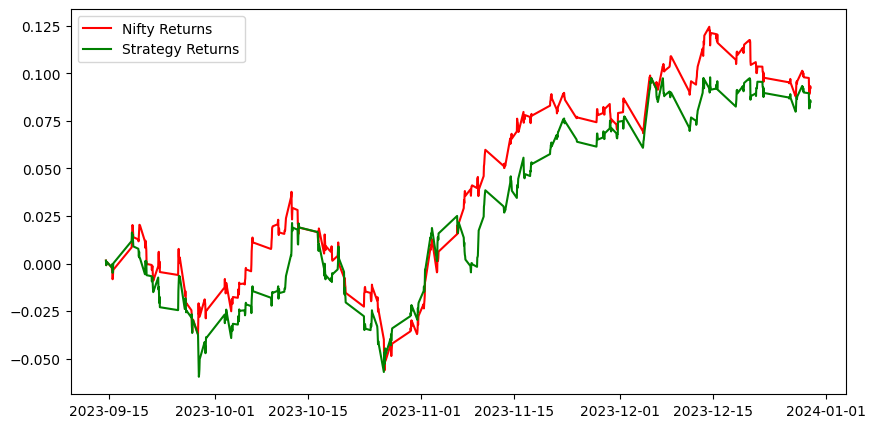

In [19]:
from sklearn.impute import SimpleImputer

predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')  # ปรับชื่อรายการให้เป็น 'Nifty Returns'
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')  # ปรับชื่อรายการให้เป็น 'Strategy Returns'
plt.legend()
plt.show()


In [20]:
#Micro = yf.Ticker('MSFT')
Micro = yf.Ticker('META')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
Micro_price_df = Micro.history(interval='1h',start=start,end=end)
df2 = Micro_price_df["Close"]
df2 = pd.DataFrame(df2)
df2


,Close
Datetime,
2023-01-03 09:30:00-05:00,123.099998
2023-01-03 10:30:00-05:00,124.629997
2023-01-03 11:30:00-05:00,123.930000
2023-01-03 12:30:00-05:00,124.529999
2023-01-03 13:30:00-05:00,124.730003
...,...
2023-12-29 11:30:00-05:00,352.149994
2023-12-29 12:30:00-05:00,353.519989
2023-12-29 13:30:00-05:00,353.295013


In [21]:

merged_df = pd.merge(df.iloc[:,:9], df2,on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Close_y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.54619,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.25569,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.03168,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.09668,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.23818,0.281607,62.047006,0.000000,0.364998,128.750000


In [22]:
merged_df.rename(columns={'Close_x': 'Close_APPL'}, inplace=True)
merged_df.rename(columns={'Close_y': 'Close_Micro'}, inplace=True)

Xb_df = merged_df.iloc[:,:10]

Xb = Xb_df.copy()

Xb.head()

,Open,High,Low,Close_APPL,S_10,Corr,RSI,Open-Close,Open-Open,Close_Micro
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.54619,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.25569,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.03168,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.09668,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.23818,0.281607,62.047006,0.000000,0.364998,128.750000


In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scalerb = StandardScaler()
Xb = scalerb.fit_transform(Xb)  # Assuming X is your feature matrix
Xb

array([[-2.75919306, -2.76897759, -2.76768967, ...,  0.03432922,
        -0.05825904, -2.18665906],
       [-2.79491255, -2.80842605, -2.81407185, ...,  0.016414  ,
        -0.7686322 , -2.18326162],
       [-2.83777612, -2.87297736, -2.83012705, ...,  0.03432922,
        -0.91311908, -2.19482921],
       ...,
       [ 1.13513462,  1.14058141,  1.16231424, ...,  0.02405154,
        -0.04621617,  1.46705982],
       [ 1.14763687,  1.15731696,  1.17480217, ...,  0.00346475,
         0.20663817,  1.49278334],
       [ 1.18097501,  1.18122553,  1.16945059, ...,  0.00346475,
         0.62803757,  1.47838437]])

In [24]:
yb = np.where(merged_df['Close_APPL'].shift(-1) > merged_df['Close_APPL'],1,-1)
yb

array([-1, -1,  1, ...,  1, -1, -1])

In [25]:
merged_df

,Open,High,Low,Close_APPL,S_10,Corr,RSI,Open-Close,Open-Open,Close_Micro
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.546190,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.255690,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.031680,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.096680,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.238180,0.281607,62.047006,0.000000,0.364998,128.750000
...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998,352.149994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998,353.519989
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000,353.295013


In [26]:
splitb = int(0.7*len(merged_df))
Xb_train, Xb_test, yb_train, yb_test = Xb[:splitb], Xb[splitb:], yb[:splitb], yb[splitb:]

In [27]:

modelb = LogisticRegression(max_iter=1000)
modelb = modelb.fit(Xb_train, yb_train)


In [28]:
pd.DataFrame(zip(Xb_df.columns, np.transpose(modelb.coef_)))

,0,1
0,Open,[-0.4694425597339615]
1,High,[-0.3066048359591896]
2,Low,[0.5049147575935569]
3,Close_APPL,[0.18437491242441234]
4,S_10,[-0.30789217757311826]
5,Corr,[0.05332793077492904]
6,RSI,[-0.00029411320297009]
7,Open-Close,[-0.06987973757052697]
8,Open-Open,[-0.011412522170910426]
9,Close_Micro,[0.36297788926879915]


In [29]:
# Specify the date for prediction
predictionb_date = '2023-12-31'
probabilityb = modelb.predict_proba(Xb_test)
probabilityb

array([[0.41301803, 0.58698197],
       [0.41624075, 0.58375925],
       [0.41754477, 0.58245523],
       ...,
       [0.44932865, 0.55067135],
       [0.43944042, 0.56055958],
       [0.44637973, 0.55362027]])

In [30]:
predictedb = modelb.predict(Xb_test)
predictedb

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [31]:

print(metrics.confusion_matrix(yb_test, predictedb))

[[ 16 226]
 [ 17 259]]


In [32]:
print(metrics.classification_report(yb_test, predictedb))

              precision    recall  f1-score   support

          -1       0.48      0.07      0.12       242
           1       0.53      0.94      0.68       276

    accuracy                           0.53       518
   macro avg       0.51      0.50      0.40       518
weighted avg       0.51      0.53      0.42       518



In [33]:
print(modelb.score(Xb_test,yb_test))

0.5308880308880309


In [34]:
cross_val = cross_val_score(LogisticRegression(), Xb, yb, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.53757225 0.53179191 0.56647399 0.48554913 0.53488372 0.53488372
 0.48837209 0.52906977 0.54651163 0.48837209]
0.5243480306492808


#B.Apple Stock มีผลกระทบจากค่าของของ Faceook Stock(Meta)

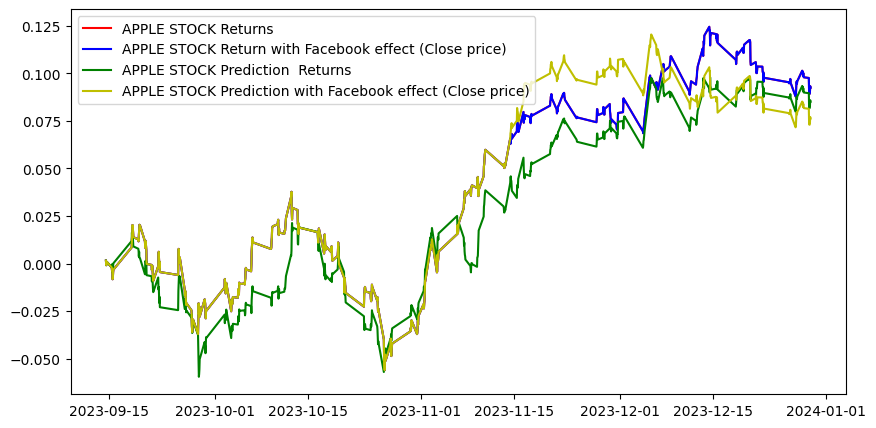

In [35]:
plt.figure(figsize=(10,5))

##เส้นที่ 1 ผลตอบแทนจริงของ BH กรณีปกติ
plt.plot(Cumulative_Nifty_returns, color='r',label = 'APPLE STOCK Returns')


##เส้นที่ 2 ผลตอบแทนจริงของ BH กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม/
merged_df['Predicted_Signalb'] = modelb.predict(Xb)
merged_df['APPL_Micro'] = np.log(merged_df['Close_APPL']/merged_df['Close_APPL'].shift(1))
Cumulative_APPL_Micro_returns = np.cumsum(merged_df[splitb:]['APPL_Micro'])
plt.plot(Cumulative_APPL_Micro_returns, color='b',label = 'APPLE STOCK Return with Facebook effect (Close price)')

##เส้นที่ 3 ผลตอบแทนของตาม model กรณีปกติ
plt.plot(Cumulative_Strategy_returns, color='g', label = 'APPLE STOCK Prediction  Returns')


##เส้นที่ 4 ผลตอบแทนของตาม model กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม
merged_df['Strategy_returnsb'] = merged_df['APPL_Micro']* merged_df['Predicted_Signalb'].shift(1)
Cumulative_Strategy_returnsb = np.cumsum(merged_df[splitb:]['Strategy_returnsb'])
plt.plot(Cumulative_Strategy_returnsb, color='y', label = 'APPLE STOCK Prediction with Facebook effect (Close price)')


plt.legend()
plt.show()